# Ensemble Learning and Random Forests

*wisdom of the crowd* - an answer to a complex question, aggregated over thousands of random people, in many cases is better than an expert's answer

This is the core idea behind *ensemble learning*. In this method of prediction, we aggregate the predictions of a group of predictors (like classifiers or regressors). The group of predictors is called an *ensemble*.

Consider a single Decision Tree Classifier. If we train a group of singular Decision Trees, each on a random subset of a larger training set, we are performing ensemble learning. To make a prediction then, we would ask each Decision Tree to make a prediction, then return the class that gets the most votes among all the Decision Trees. This ensemble of Decision Trees is called a *Random Forest*.

Popular ensemble methods include: *bagging*, *boosting*, and *stacking*.

## Voting Classifiers

### Hard Voting 

Suppose you have a group of trained classifers. For example, a KNN, SVM, Random Forest, and Logistic Regression classifier, each with an accuracy of 80%. A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes! This majority-vote classifier is called a *hard voting* classifier.

A hard voting classifier will often perform better than the individual classifiers from which it is made. Even if each classifier is a *weak learner* (meaning it does only slightly better than randomly guessing), the ensemble can still be a *strong learner*, provided there are a sufficient number of weak learners and they are sufficiently diverse.

Ensemble methods work best when the predictors are as independent from one another as possible. One way to get diverse classifiers is to train them using very different algorithms. This increases the change that they will make very different types of errors, improving the ensemble's accuracy.

Let's train a voting classifier using the moons dataset from Ch. 5 of the textbook:

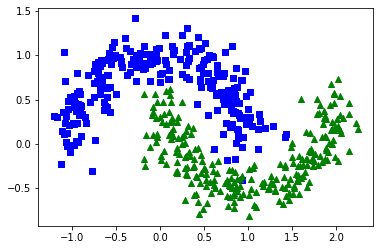

In [12]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=500, noise=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

colors = {0: 'blue', 1: 'green'}
shape = {0: 's', 1: '^'}

for i in range(len(y)):
    x_1 = X[i, 0]
    x_2 = X[i, 1]
    flag = y[i]
    plt.scatter(x_1, x_2, c=colors[flag], marker=shape[flag])
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('svc', svm_clf)],
    voting='hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [14]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rf_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.84
RandomForestClassifier 0.96
SVC 0.96
VotingClassifier 0.96


### Soft Voting

If all classifiers are able to estimate class probability (i.e., they all have the `predict_proba()` method), then you can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers. This is called *soft voting*. It often achieves higher performance than hard voting because it gives more weight to highly confident votes! Simply replace `voting='hard'` with `voting='soft'` and ensure that all classifiers can estimate class probabilities.

---

## Bagging and Pasting